In [27]:
import pandas as pd
data = pd.read_csv("C:\\Users\\PC\\Desktop\\Tensorflow\\data.csv")


In [28]:
data

,text,@@class@@
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,pos
1,منتوج رائع وثمن مناسب ....جميل,pos
2,كلنا ابن كيران لمتافق معايا يدير جيم,pos
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,pos
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,pos
...,...,...
1995,اصمت لعلى صمتك راحة بالنسبة لهم,neg
1996,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,neg
1997,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,neg
1998,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,neg


In [32]:
# Renommer les colonnes
data.rename(columns={'text': 'tweet', '@@class@@': 'label'}, inplace=True)

In [33]:
data

,tweet,label
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,pos
1,منتوج رائع وثمن مناسب ....جميل,pos
2,كلنا ابن كيران لمتافق معايا يدير جيم,pos
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,pos
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,pos
...,...,...
1995,اصمت لعلى صمتك راحة بالنسبة لهم,neg
1996,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,neg
1997,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,neg
1998,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,neg


In [37]:
import re

def clean_text_arabic_darija(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+|#\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\u0621-\u064A\u0660-\u0669\u200C\u200B\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
data['tweet'] = data['tweet'].apply(clean_text_arabic_darija)
data['label'] = data['label'].replace({'pos': 1, 'neg': 0})
data.head()


,tweet,label
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,1
1,منتوج رائع وثمن مناسب جميل,1
2,كلنا ابن كيران لمتافق معايا يدير جيم,1
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,1
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,1


In [40]:
data.to_csv("C:\\Users\\PC\\Desktop\\Tensorflow\\cleaned_data.csv", index=False, encoding='utf-8')

In [1]:
import pandas as pd
data = pd.read_csv("C:\\Users\\PC\\Desktop\\Tensorflow\\data.csv")

In [42]:
data

,tweet,label
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,1
1,منتوج رائع وثمن مناسب جميل,1
2,كلنا ابن كيران لمتافق معايا يدير جيم,1
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,1
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,1
...,...,...
1995,اصمت لعلى صمتك راحة بالنسبة لهم,0
1996,حديقة حيوانات ولازال هنالك اناس لا يؤمنون بنظر...,0
1997,أفعى بجدارة تريثت تربصت وكان الفحيح متعة له صد...,0
1998,لا يقطع الرأس غير الي ركبه الان اصبح تركيب الر...,0


In [2]:
print(data.dtypes)

tweet    object
label     int64
dtype: object


In [3]:
# Transformer la colonne 'label' en type float
data['label'] = data['label'].astype(float)

# Vérifier les types des colonnes après transformation
print(data.dtypes)

tweet     object
label    float64
dtype: object


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
def create_darija_sentiment_model(data):

    
    tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
    tokenizer.fit_on_texts(data['tweet']) 
    
    sequences = tokenizer.texts_to_sequences(data['tweet'])
    padded = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(50,)),  # Changed from batch_shape
        tf.keras.layers.Embedding(5000, 32),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
         tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')    
    ])
    # Compile the model
    model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Initial learning rate
    metrics=['accuracy']
    )
    return model, tokenizer, padded

def train_and_evaluate_model(data):
    # Ensure all tweets are strings
    data['tweet'] = data['tweet'].fillna('').astype(str)
    
    # Create model and preprocess data
    model, tokenizer, padded_sequences = create_darija_sentiment_model(data)
    
    # Split the data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        padded_sequences, 
        data['label'], 
        test_size=0.2, 
        random_state=42
    )

    # Create the learning rate scheduler callback
    lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',       # Monitor validation loss
    factor=0.5,               # Reduce the learning rate by a factor of 0.5
    patience=3,               # Wait for 3 epochs before reducing the learning rate
    min_lr=1e-6,              # Minimum learning rate
    verbose=1
    )
    # Train the model with the learning rate scheduler callback
    history = model.fit(
    X_train, y_train,        
    validation_data=(X_test, y_test), 
    epochs=50,
    batch_size=16,
    callbacks=[lr_scheduler]  
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    
    # Make predictions on test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return model, tokenizer, history, report

def test_custom_sentences(model, tokenizer, test_sentences):
    """Test the model with custom sentences"""
    results = []
    for sentence in test_sentences:
        # Preprocess
        sequences = tokenizer.texts_to_sequences([sentence])
        padded = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')
        
        # Predict
        prediction = model.predict(padded)[0][0]
        sentiment = "Positive" if prediction > 0.5 else "Negative"
        confidence = prediction if prediction > 0.5 else 1 - prediction
        
        results.append({
            'sentence': sentence,
            'sentiment': sentiment,
            'confidence': float(confidence)
        })
    
    return pd.DataFrame(results)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6785 - loss: 1.0629 - val_accuracy: 0.9225 - val_loss: 0.4594 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9194 - loss: 0.4291 - val_accuracy: 0.8975 - val_loss: 0.3873 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9410 - loss: 0.2712 - val_accuracy: 0.9175 - val_loss: 0.3246 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9521 - loss: 0.2129 - val_accuracy: 0.8700 - val_loss: 0.3852 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9411 - loss: 0.2447 - val_accuracy: 0.9000 - val_loss: 0.3475 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9448 - loss: 0.2206
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9448 - loss: 0.

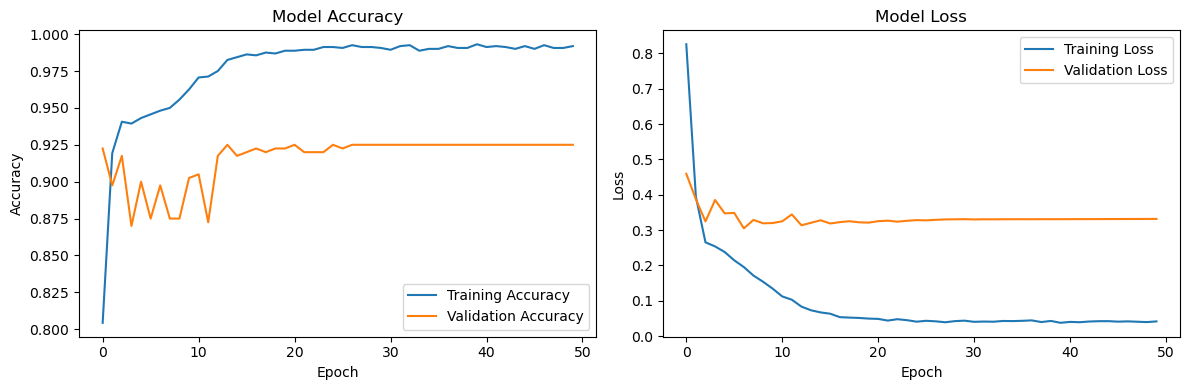

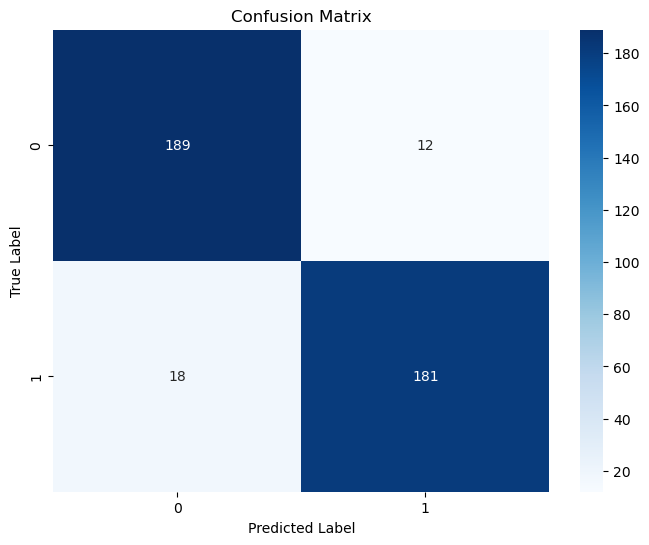

In [19]:
# trainaing:
model, tokenizer, history, report = train_and_evaluate_model(data)

In [21]:
# 3. Print evaluation results
print("Classification Report:")
print(report)

# 4. Test custom sentences
test_sentences = [
    "مزيان بزاف هاد الفيلم",
    "ما عجبنيش هاد الماكلة",
    "السياحة فهاد العام رجعات مزيانة بزاف",
    "هاد المشروع فاشل وما عندوش فائدة",
    "الخدمة هنايا مزيانة بزاف والمواطن راضي"
]

results = test_custom_sentences(model, tokenizer, test_sentences)
print("\nTest Results:")
print(results)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       201
         1.0       0.94      0.91      0.92       199

    accuracy                           0.93       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Test Results:
                                 sentence sentiment  confidence
0                   مزيان بزاف هاد الفيلم  Positive    0.986646
1                   ما عجبنيش هاد الماكلة  Negative    0.981589
2    السياحة فهاد العام رجعات مزيانة بزاف  Positive    0.983001
3        هاد المشروع فاشل وما عندوش فائدة  Negative    0.985309
4  الخدمة هنايا مزيانة بزاف والمواطن راضي  Negative    0.930308


In [7]:
import pickle
#saviing the model:import pickle
model.save('darija_sentiment_model.keras')

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

import os
# Force CPU usage
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Configure TensorFlow to use CPU
try:
    tf.config.set_visible_devices([], 'GPU')
    physical_devices = tf.config.list_physical_devices('CPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# Load the model and tokenizer
@st.cache_resource
def load_model_and_tokenizer():
    try:
        # Load the trained model with h5 format
        with tf.device('/CPU:0'):
            model = tf.keras.models.load_model('darija_sentiment_model.keras', compile=False)
            model.compile(
                loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
            )
        
        # Load the tokenizer
        with open('tokenizer.pickle', 'rb') as handle:
            tokenizer = pickle.load(handle)
            
        return model, tokenizer
    except Exception as e:
        st.error(f"Error loading model: {str(e)}")
        return None, None

def predict_sentiment(text, model, tokenizer):
    try:
        with tf.device('/CPU:0'):
            sequences = tokenizer.texts_to_sequences([text])
            padded = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')
            prediction = model.predict(padded, verbose=0)[0][0]
            sentiment = "إيجابي (Positive)" if prediction > 0.5 else "سلبي (Negative)"
            confidence = float(prediction if prediction > 0.5 else 1 - prediction)
        return sentiment, confidence
    except Exception as e:
        st.error(f"Error in prediction: {str(e)}")
        return None, None

def analyze_dataset(df, model, tokenizer):
    if 'text' not in df.columns:
        st.error("The uploaded file must contain a 'text' column")
        return None
    
    results = []
    total = len(df)
    progress_bar = st.progress(0)
    
    with tf.device('/CPU:0'):
        for idx, text in enumerate(df['text']):
            try:
                sequences = tokenizer.texts_to_sequences([str(text)])
                padded = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')
                prediction = model.predict(padded, verbose=0)[0][0]
                sentiment = "Positive" if prediction > 0.5 else "Negative"
                confidence = float(prediction if prediction > 0.5 else 1 - prediction)
                results.append({'text': text, 'sentiment': sentiment, 'confidence': confidence})
                
                # Update progress bar
                progress_bar.progress((idx + 1) / total)
            except Exception as e:
                st.warning(f"Skipped one entry due to error: {str(e)}")
                continue
    
    progress_bar.empty()
    return pd.DataFrame(results)

def main():
    try:
        physical_devices = tf.config.list_physical_devices('CPU')
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except:
        pass
        
    st.set_page_config(
        page_title="Darija Sentiment Analysis",
        page_icon="🇲🇦",
        layout="wide"
    )
    
    # Load model and tokenizer
    model, tokenizer = load_model_and_tokenizer()
    
    if model is None or tokenizer is None:
        st.error("Please ensure model files (darija_sentiment_model.keras and tokenizer.pickle) are in the same directory as this script.")
        return
    
    st.title("تحليل المشاعر بالدارجة 🇲🇦")
    st.title("Darija Sentiment Analysis")
    
    # Create tabs
    tab1, tab2 = st.tabs(["Text Analysis", "Dataset Analysis"])
